# **2. Core Text Processing and Tool Comparison (15%)**

**a.Dataset**

In [1]:
import pandas as pd

data = {
    "review": [
        "I absolutely love this new phone!",
        "The battery life could be better.",
        "Amazing camera and display quality.",
        "This phone is terrible — laggy and slow.",
        "I’m not impressed with the performance.",
        "Great value for the price.",
        "The updates keep causing issues.",
        "Excellent design, but it overheats quickly.",
        "Would not recommend to a friend.",
        "Fast and responsive under heavy use."
    ]
}

df = pd.DataFrame(data)

D:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


**b. Apply Techniques: NLTK vs SpaCy**

NLTK

In [2]:
# Re-download required NLTK data
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
# Download the missing 'punkt_tab' resource
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply tokenization, stemming, lemmatization
df["tokens_nltk"] = df["review"].apply(word_tokenize)
df["stemmed_nltk"] = df["tokens_nltk"].apply(lambda tokens: [stemmer.stem(w) for w in tokens])
df["lemmatized_nltk"] = df["tokens_nltk"].apply(lambda tokens: [lemmatizer.lemmatize(w) for w in tokens])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arunr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arunr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\arunr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\arunr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


SpaCy

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

def spacy_pipeline(text):
    doc = nlp(text)
    return {
        "tokens": [token.text for token in doc],
        "lemmas": [token.lemma_ for token in doc]
    }

df["spacy_results"] = df["review"].apply(spacy_pipeline)
df["tokens_spacy"] = df["spacy_results"].apply(lambda x: x["tokens"])
df["lemmatized_spacy"] = df["spacy_results"].apply(lambda x: x["lemmas"])

**c. Visualize Results**

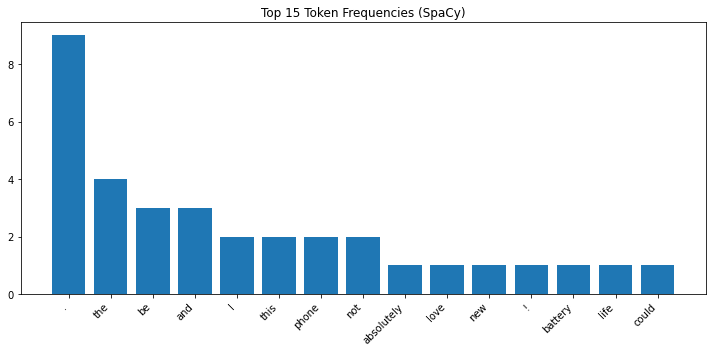

In [4]:
import matplotlib.pyplot as plt
from collections import Counter

top_n = 15

# Flatten the list of lists of tokens from the 'lemmatized_spacy' column
all_spacy_tokens = [token for sublist in df['lemmatized_spacy'] for token in sublist]

# Calculate the frequency of each token
freq_spacy = Counter(all_spacy_tokens)

most_common = freq_spacy.most_common(top_n)
tokens, counts = zip(*most_common)

plt.figure(figsize=(10, 5))
plt.bar(tokens, counts)
plt.title(f"Top {top_n} Token Frequencies (SpaCy)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
# Create side-by-side view of outputs
comparison_df = df[["review", "tokens_nltk", "stemmed_nltk", "lemmatized_nltk", "tokens_spacy", "lemmatized_spacy"]]
comparison_df.head()

,review,tokens_nltk,stemmed_nltk,lemmatized_nltk,tokens_spacy,lemmatized_spacy
0,I absolutely love this new phone!,"[I, absolutely, love, this, new, phone, !]","[i, absolut, love, thi, new, phone, !]","[I, absolutely, love, this, new, phone, !]","[I, absolutely, love, this, new, phone, !]","[I, absolutely, love, this, new, phone, !]"
1,The battery life could be better.,"[The, battery, life, could, be, better, .]","[the, batteri, life, could, be, better, .]","[The, battery, life, could, be, better, .]","[The, battery, life, could, be, better, .]","[the, battery, life, could, be, well, .]"
2,Amazing camera and display quality.,"[Amazing, camera, and, display, quality, .]","[amaz, camera, and, display, qualiti, .]","[Amazing, camera, and, display, quality, .]","[Amazing, camera, and, display, quality, .]","[amazing, camera, and, display, quality, .]"
3,This phone is terrible — laggy and slow.,"[This, phone, is, terrible, —, laggy, and, slo...","[thi, phone, is, terribl, —, laggi, and, slow, .]","[This, phone, is, terrible, —, laggy, and, slo...","[This, phone, is, terrible, —, laggy, and, slo...","[this, phone, be, terrible, —, laggy, and, slo..."
4,I’m not impressed with the performance.,"[I, ’, m, not, impressed, with, the, performan...","[i, ’, m, not, impress, with, the, perform, .]","[I, ’, m, not, impressed, with, the, performan...","[I, ’m, not, impressed, with, the, performance...","[I, be, not, impressed, with, the, performance..."


# **3. Named Entity Recognition & Sentiment Analysis (20%)**

**a. NER Task: Setup NER pipeline using dslim/bert-base-NER**

In [6]:
from transformers import pipeline
ner_model = pipeline("ner", model="dslim/bert-base-NER", aggregation_strategy="simple")

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [7]:
sentences_ner = [
    "Apple Inc. was founded by Steve Jobs in Cupertino.",
    "Barack Obama was the 44th President of the United States.",
    "The Eiffel Tower is located in Paris, France.",
    "Google's headquarters are in Mountain View.",
    "Elon Musk announced new Tesla models yesterday.",
    "Amazon employs thousands of people worldwide.",
    "The United Nations held a conference in New York.",
    "Tesla's stock price surged after the announcement.",
    "Bill Gates donated millions to charity.",
    "Microsoft launched a new Surface device in Seattle."
]
# Get entities for each sentence
entities_per_sentence = [ner_model(sentence) for sentence in sentences_ner]

**b. Sentiment Analysis: Setup sentiment analysis pipeline**

In [8]:
sentiment_model = pipeline("sentiment-analysis")

# Sample Amazon product reviews for sentiment analysis
reviews = [
    "This phone has an amazing camera and battery life.",
    "Terrible customer service, very disappointed.",
    "The laptop is fast and lightweight, highly recommend it!",
    "Poor build quality, it broke within a month.",
    "Excellent sound quality, great value for money.",
    "The product arrived late and was damaged.",
    "Love this blender, it works perfectly every time.",
    "Not worth the price, very cheap materials.",
    "Fantastic TV with stunning display.",
    "Battery drains quickly, not happy with the purchase."
]
# Get sentiment for each review
sentiments = sentiment_model(reviews)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


**c. Print results: NER entities and sentiment analysis**

In [9]:
print("=== Named Entity Recognition Results ===")
for i, sentence in enumerate(sentences_ner):
    print(f"Sentence: {sentence}")
    for ent in entities_per_sentence[i]:
        print(f"  Entity: {ent['word']}, Type: {ent['entity_group']}, Score: {ent['score']:.3f}")
    print()

print("\n=== Sentiment Analysis Results ===")
for review, sentiment in zip(reviews, sentiments):
    print(f"Review: {review}")
    print(f"  Sentiment: {sentiment['label']}, Score: {sentiment['score']:.3f}")
    print()

=== Named Entity Recognition Results ===
Sentence: Apple Inc. was founded by Steve Jobs in Cupertino.
  Entity: Apple Inc, Type: ORG, Score: 0.999
  Entity: Steve Jobs, Type: PER, Score: 0.984
  Entity: Cupertino, Type: LOC, Score: 0.998

Sentence: Barack Obama was the 44th President of the United States.
  Entity: Barack Obama, Type: PER, Score: 1.000
  Entity: United States, Type: LOC, Score: 1.000

Sentence: The Eiffel Tower is located in Paris, France.
  Entity: E, Type: LOC, Score: 0.966
  Entity: ##iff, Type: LOC, Score: 0.499
  Entity: ##el Tower, Type: LOC, Score: 0.927
  Entity: Paris, Type: LOC, Score: 0.999
  Entity: France, Type: LOC, Score: 0.999

Sentence: Google's headquarters are in Mountain View.
  Entity: Google, Type: ORG, Score: 0.999
  Entity: Mountain View, Type: LOC, Score: 0.997

Sentence: Elon Musk announced new Tesla models yesterday.
  Entity: Elon Musk, Type: ORG, Score: 0.996
  Entity: Tesla, Type: MISC, Score: 0.775

Sentence: Amazon employs thousands of p

**Visualization of Sentiment Analysis**

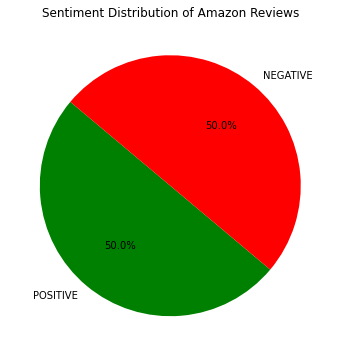

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

# Count sentiment labels
sentiment_labels = [s['label'] for s in sentiments]
counter = Counter(sentiment_labels)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counter.values(), labels=counter.keys(), autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title("Sentiment Distribution of Amazon Reviews")
plt.show()

**Table Creation: Combine sentences/reviews and results**

In [11]:
import pandas as pd

# NER results in a summary string format per sentence
ner_summary = []
for ents in entities_per_sentence:
    ents_str = ", ".join([f"{ent['word']} ({ent['entity_group']})" for ent in ents])
    ner_summary.append(ents_str)

# Sentiment results as DataFrame
sentiment_df = pd.DataFrame({
    "Review": reviews,
    "Sentiment": [s['label'] for s in sentiments],
    "Score": [s['score'] for s in sentiments]
})

# NER results as DataFrame
ner_df = pd.DataFrame({
    "Sentence": sentences_ner,
    "Entities": ner_summary
})

# Show first few rows
print("NER Results:")
print(ner_df.head(), "\n")

print("Sentiment Analysis Results:")
print(sentiment_df.head())

NER Results:
                                            Sentence  \
0  Apple Inc. was founded by Steve Jobs in Cupert...   
1  Barack Obama was the 44th President of the Uni...   
2      The Eiffel Tower is located in Paris, France.   
3        Google's headquarters are in Mountain View.   
4    Elon Musk announced new Tesla models yesterday.   

                                            Entities  
0  Apple Inc (ORG), Steve Jobs (PER), Cupertino (...  
1            Barack Obama (PER), United States (LOC)  
2  E (LOC), ##iff (LOC), ##el Tower (LOC), Paris ...  
3                  Google (ORG), Mountain View (LOC)  
4                      Elon Musk (ORG), Tesla (MISC)   

Sentiment Analysis Results:
                                              Review Sentiment     Score
0  This phone has an amazing camera and battery l...  POSITIVE  0.999806
1      Terrible customer service, very disappointed.  NEGATIVE  0.999804
2  The laptop is fast and lightweight, highly rec...  POSITIVE  0.99980

# **4. Word Embeddings and Language Understanding (15%)**

In [12]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

corpus = [
    "The product is great and works well.",
    "I love this item. It was exactly what I expected.",
    "Terrible quality. Completely disappointed.",
    "Highly recommend this to anyone looking for good value.",
    "Do not buy. Waste of money."
]

stop_words = set(stopwords.words('english'))
tokenized_corpus = [[word.lower() for word in word_tokenize(doc) if word.isalpha() and word.lower() not in stop_words] for doc in corpus]

model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, sg=1)  # sg=1: Skip-gram

similar_words = model.wv.most_similar("product", topn=5)
print("Words similar to 'product':", similar_words)

Words similar to 'product': [('great', 0.1486244648694992), ('waste', 0.1117919310927391), ('looking', 0.10757596790790558), ('love', 0.09769199788570404), ('money', 0.08404716104269028)]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arunr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arunr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **5. Mini NLP Project: Text Classification (30%)**

              precision    recall  f1-score   support

           0       0.81      0.38      0.52       450
           1       0.84      0.97      0.90      1550

    accuracy                           0.84      2000
   macro avg       0.83      0.68      0.71      2000
weighted avg       0.84      0.84      0.82      2000



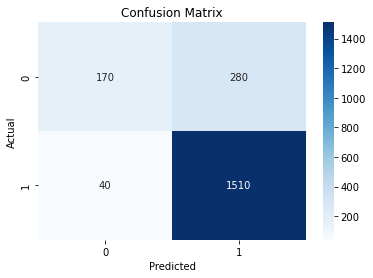

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("C:\\Users\\arunr\\Downloads\\Reviews.csv")

# Drop NA and reduce size
df.dropna(subset=["Text"], inplace=True)
df = df.sample(n=10000, random_state=42)

# Label: positive (Score >=4) = 1, negative (<4) = 0
df["label"] = df["Score"].apply(lambda x: 1 if x >= 4 else 0)

# Preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

df["clean_text"] = df["Text"].apply(clean_text)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.2, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


              precision    recall  f1-score   support

           0       0.56      0.76      0.65       450
           1       0.92      0.83      0.87      1550

    accuracy                           0.81      2000
   macro avg       0.74      0.79      0.76      2000
weighted avg       0.84      0.81      0.82      2000



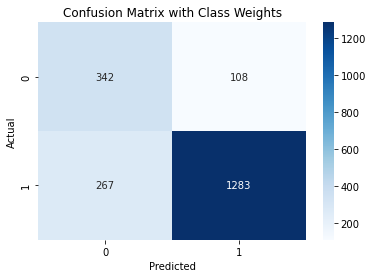

In [14]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Train Logistic Regression with class weights
model_weighted = LogisticRegression(class_weight=class_weights_dict, max_iter=1000)
model_weighted.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred_weighted = model_weighted.predict(X_test_vec)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_weighted))

cm_weighted = confusion_matrix(y_test, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix with Class Weights")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.452900
100,0.326600


Evaluation results: {'eval_loss': 0.3227452337741852, 'eval_runtime': 36.2224, 'eval_samples_per_second': 11.043, 'eval_steps_per_second': 0.69, 'epoch': 1.0}
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       101
           1       0.91      0.90      0.91       299

    accuracy                           0.86       400
   macro avg       0.81      0.82      0.82       400
weighted avg       0.86      0.86      0.86       400



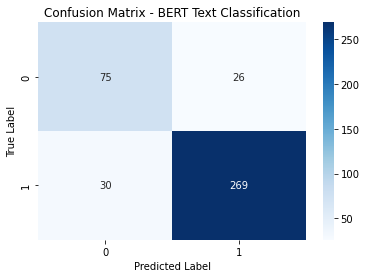

In [15]:

import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

#  Load and preprocess dataset
df = pd.read_csv("C:\\Users\\arunr\\Downloads\\Reviews.csv")
df = df.dropna(subset=['Text']).sample(n=2000, random_state=42)
df['label'] = (df['Score'] >= 4).astype(int)

def clean_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.lower()

df['clean_text'] = df['Text'].apply(clean_text)

#  Train-test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42
)

#  Tokenization using BERT tokenizer (fast)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)

#  Create Huggingface datasets
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': list(train_labels)
})

test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': list(test_labels)
})

#  Load BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

#  Define training arguments 
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,              
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_steps=50,
    save_strategy='no',
    report_to='none',
    disable_tqdm=False,
)
#  Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

#  Train the model
trainer.train()

#  Evaluate model manually after training
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

#  Predict on test set
preds_output = trainer.predict(test_dataset)
preds = np.argmax(preds_output.predictions, axis=1)

print("=== Classification Report ===")
print(classification_report(test_labels, preds))

cm = confusion_matrix(test_labels, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - BERT Text Classification')
plt.show()
